In [903]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import math

In [904]:
data = pd.read_csv('../source_data/diabetes_dataset.csv')
data

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [905]:
NUMERICAL_FEATURES = ['physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day',
                      'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total',
                      'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 
                      'hba1c', 'diabetes_risk_score']

In [906]:
data = data.rename(columns={'diagnosed_diabetes': 'target'})

## I. Label encoding for the binary gender feature and one-hot encoding for all other categorical features.

One-hot encoding is applied to avoid introducing artificial ordinal relationships between multi-class categorical variables.

---

In [907]:
# Label encoding is appropriate for the gender feature since it contains only two categories.
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

In [908]:
# One-hot encoding is used for multi-class categorical features to prepare the data for modeling.
categorical_cols = ['ethnicity', 'education_level', 'income_level',
                    'employment_status', 'smoking_status', 'diabetes_stage', 'alcohol_consumption_per_week']

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [909]:
data = data.astype(float)

## II. Outlier handling

In this section, we will examine the features in the dataset and look for outliers. Then, we will decide how to handle them.

---

#### 1. Showing data

In [910]:
data

,age,gender,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,alcohol_consumption_per_week_1,alcohol_consumption_per_week_2,alcohol_consumption_per_week_3,alcohol_consumption_per_week_4,alcohol_consumption_per_week_5,alcohol_consumption_per_week_6,alcohol_consumption_per_week_7,alcohol_consumption_per_week_8,alcohol_consumption_per_week_9,alcohol_consumption_per_week_10
0,58.0,1.0,215.0,5.7,7.9,7.9,0.0,0.0,0.0,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48.0,0.0,143.0,6.7,6.5,8.7,0.0,0.0,0.0,23.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,1.0,57.0,6.4,10.0,8.1,1.0,0.0,0.0,22.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,74.0,0.0,49.0,3.4,6.6,5.2,0.0,0.0,0.0,26.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.0,1.0,109.0,7.2,7.4,5.0,0.0,0.0,0.0,21.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46.0,1.0,136.0,8.3,6.4,4.5,0.0,0.0,0.0,29.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,41.0,0.0,76.0,8.8,6.8,4.8,0.0,0.0,0.0,26.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,57.0,0.0,121.0,9.9,5.0,6.1,0.0,0.0,1.0,25.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,47.0,0.0,52.0,5.9,6.7,0.5,0.0,1.0,0.0,26.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2. Boxplot visualisation
In this way, we gain a better understanding of the scale and the data, 

as well as whether there are many points that are identified as outliers according to the IQR method

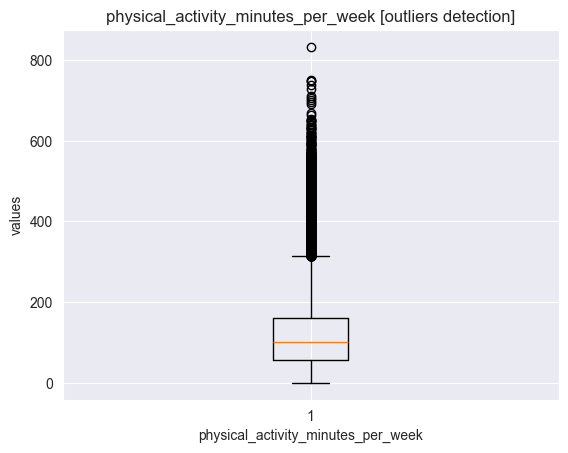

In [911]:
plt.boxplot(data['physical_activity_minutes_per_week'])
plt.title('physical_activity_minutes_per_week [outliers detection]')
plt.xlabel('physical_activity_minutes_per_week')
plt.ylabel('values')
plt.show()

#### 3. Calculate the first quartile (Q1) of the feature.
##### Q1 represents the value below which 25% of the data fall.

In [912]:
Q1 = data['physical_activity_minutes_per_week'].quantile(0.25)
Q1

np.float64(57.0)

#### 4. Calculate the third quartile (Q3) of the feature.
##### Q3 represents the value below which 75% of the data fall.

In [913]:
Q3 = data['physical_activity_minutes_per_week'].quantile(0.75)
Q3

np.float64(160.0)

### 5. Compute the Interquartile Range (IQR).
##### IQR measures the spread of the middle 50% of the data and is used to detect outliers.


In [914]:
IQR = Q3 - Q1
IQR

np.float64(103.0)

### 6. Compute the lower and upper bounds for outlier detection using the IQR method.
##### Any values below 'lower' or above 'upper' will be considered outliers.

In [915]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper

(np.float64(-97.5), np.float64(314.5))

### 7. Count how many values fall outside the lower and upper IQR bounds.


In [916]:
((data['physical_activity_minutes_per_week'] < lower) | (data['physical_activity_minutes_per_week'] > upper)).sum()

np.int64(3199)

### 8. Outlier Treatment Summary Table
##### In the table below, you will find information about the conditions under which different outlier handling approaches are applied

In [917]:
summary_table = pd.DataFrame({
    'Method':['Removing Outliers', 'Winsorization', 'Transofrmations', 'Percentile Capping', 'Binning'],
    'When To Use': ['Few outliers, large dataset', 'Many outliers, valid values', 'Skewed data', 'Heavy-tailed real data', 'Value precision not needed'],
    'Pros': ['Cleanest data', 'Keeps data, reduce extremes', 'Normalizes distribution', 'Flexible and robust', 'Simplifies data'],
    'Cons': ['Data loss', 'Slight distortion', 'Less interpretable', 'Requires tuning', 'Loses information']
}, index=['IQR_drop', 'Clipping', 'log1p', 'Percentile_capping', 'Binning'])

summary_table

,Method,When To Use,Pros,Cons
IQR_drop,Removing Outliers,"Few outliers, large dataset",Cleanest data,Data loss
Clipping,Winsorization,"Many outliers, valid values","Keeps data, reduce extremes",Slight distortion
log1p,Transofrmations,Skewed data,Normalizes distribution,Less interpretable
Percentile_capping,Percentile Capping,Heavy-tailed real data,Flexible and robust,Requires tuning
Binning,Binning,Value precision not needed,Simplifies data,Loses information


## III. Numerical Feature Distribution and Skewness Analysis

---

In [918]:
# Skewness correction is applied when a numerical feature shows substantial asymmetry in its distribution, 
# typically caused by a long right tail with a few very large values.
# link: https://medium.com/@samiraalipour/understanding-and-handling-skewness-in-machine-6e8fc8b15382
data[NUMERICAL_FEATURES].skew().sort_values(ascending=False)

physical_activity_minutes_per_week    1.389970
diabetes_risk_score                   0.514610
insulin_level                         0.422475
ldl_cholesterol                       0.319901
systolic_bp                           0.218756
triglycerides                         0.104035
screen_time_hours_per_day             0.082573
glucose_fasting                       0.046037
cholesterol_total                     0.033572
hba1c                                 0.031969
glucose_postprandial                  0.027832
diastolic_bp                          0.007074
bmi                                   0.006296
waist_to_hip_ratio                    0.005584
hdl_cholesterol                      -0.002626
sleep_hours_per_day                  -0.012613
heart_rate                           -0.016811
diet_score                           -0.070251
dtype: float64

In [919]:
skew_ranges = pd.DataFrame({
    'Skewness Range': ['0.00 – 0.50', 
                       '0.50 – 1.00', 
                       '> 1.00'],
    
    'Interpretation': ['Symmetric or lightly skewed',
                       'Moderately skewed',
                       'Highly skewed (right-tailed)'],
    
    'Recommended Action': ['No transformation required',
                           'Optional transformation',
                           'Log-transformation recommended']
})

skew_ranges

,Skewness Range,Interpretation,Recommended Action
0,0.00 – 0.50,Symmetric or lightly skewed,No transformation required
1,0.50 – 1.00,Moderately skewed,Optional transformation
2,> 1.00,Highly skewed (right-tailed),Log-transformation recommended


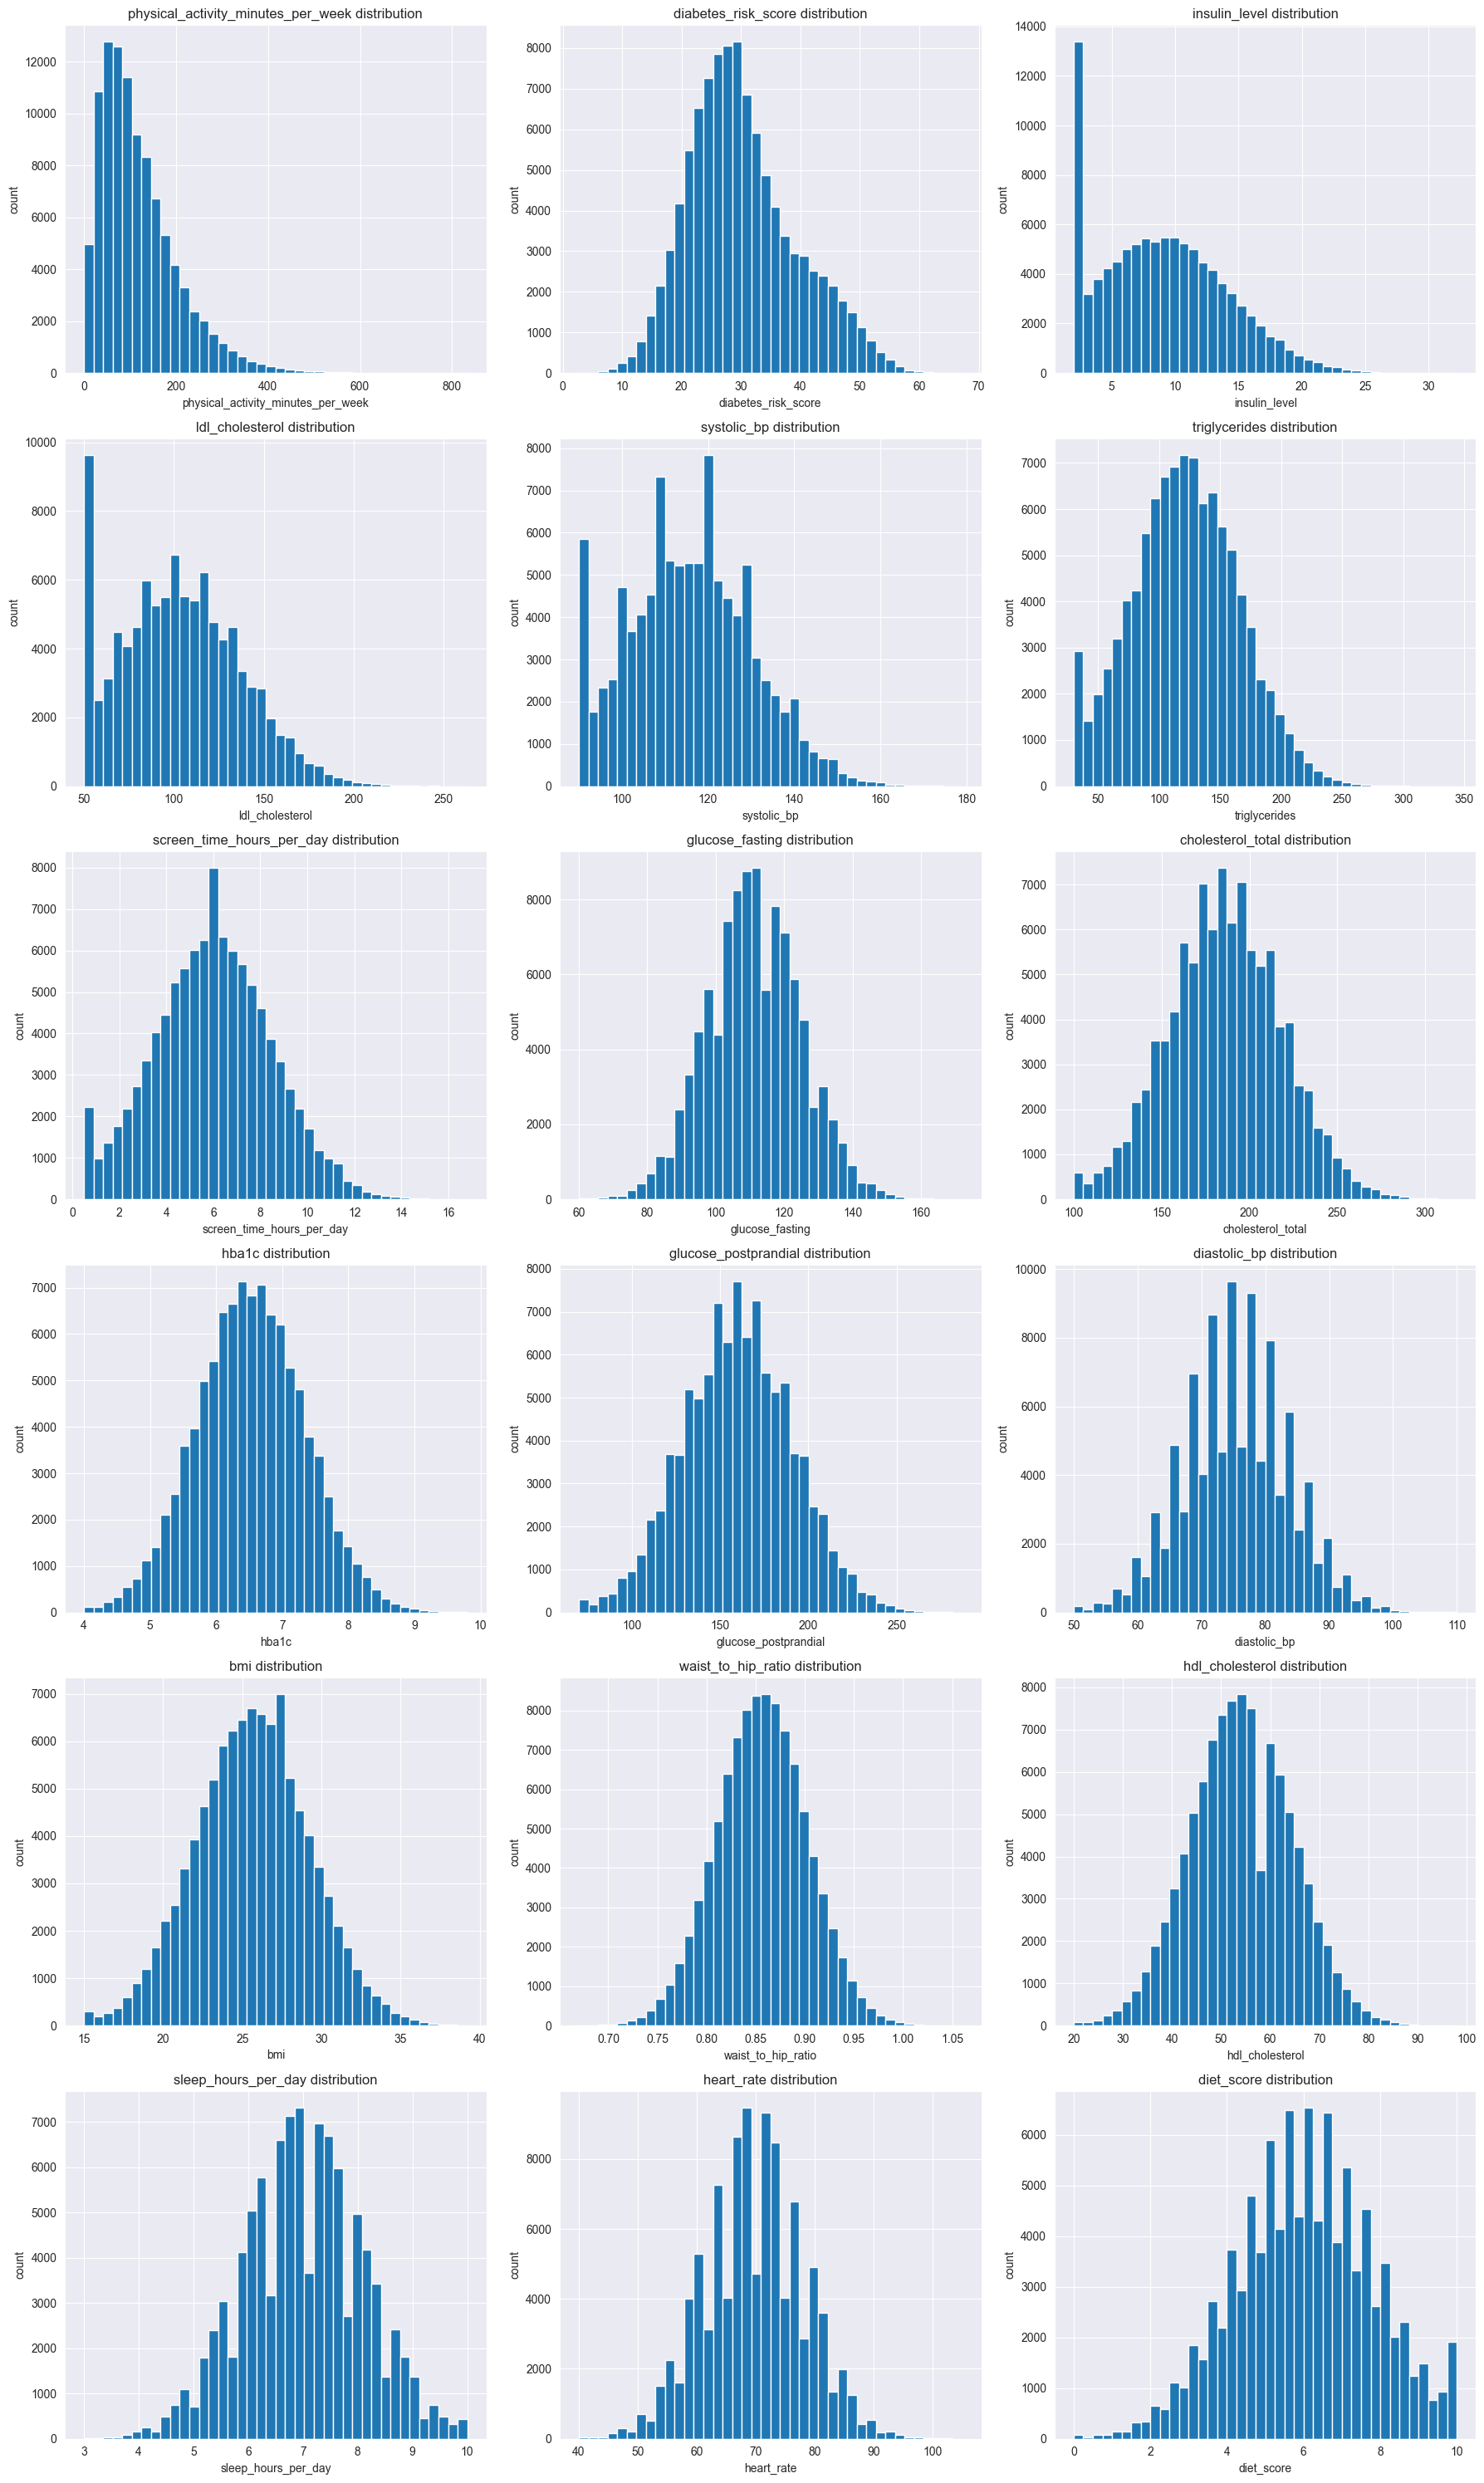

In [920]:
features = data[NUMERICAL_FEATURES].skew().sort_values(ascending=False).index[:18]
n = len(features)

cols = 3                     
rows = math.ceil(n / cols)   

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for ax, feature in zip(axes, features):
    ax.hist(data[feature], bins=40)
    ax.set_title(f'{feature} distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('count')

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [921]:
data

,age,gender,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,alcohol_consumption_per_week_1,alcohol_consumption_per_week_2,alcohol_consumption_per_week_3,alcohol_consumption_per_week_4,alcohol_consumption_per_week_5,alcohol_consumption_per_week_6,alcohol_consumption_per_week_7,alcohol_consumption_per_week_8,alcohol_consumption_per_week_9,alcohol_consumption_per_week_10
0,58.0,1.0,215.0,5.7,7.9,7.9,0.0,0.0,0.0,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48.0,0.0,143.0,6.7,6.5,8.7,0.0,0.0,0.0,23.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,1.0,57.0,6.4,10.0,8.1,1.0,0.0,0.0,22.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,74.0,0.0,49.0,3.4,6.6,5.2,0.0,0.0,0.0,26.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.0,1.0,109.0,7.2,7.4,5.0,0.0,0.0,0.0,21.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46.0,1.0,136.0,8.3,6.4,4.5,0.0,0.0,0.0,29.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,41.0,0.0,76.0,8.8,6.8,4.8,0.0,0.0,0.0,26.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,57.0,0.0,121.0,9.9,5.0,6.1,0.0,0.0,1.0,25.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,47.0,0.0,52.0,5.9,6.7,0.5,0.0,1.0,0.0,26.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After sorting the features by skewness, we observed that only one of them requires transformation: `physical_activity_minutes_per_week`. We will apply `log1p` to correct the 

distribution of its values. 

After obtaining the results, we will evaluate them and decide whether this is the appropriate approach or if another transformation method will be needed.

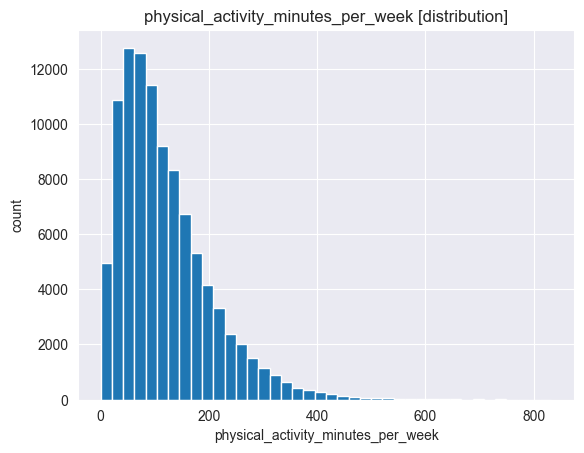

In [922]:
data_physical_activity_minutes_per_week = data['physical_activity_minutes_per_week']
plt.hist(data_physical_activity_minutes_per_week, bins=40)
plt.title('physical_activity_minutes_per_week [distribution]')
plt.xlabel('physical_activity_minutes_per_week')
plt.ylabel('count')
plt.show()

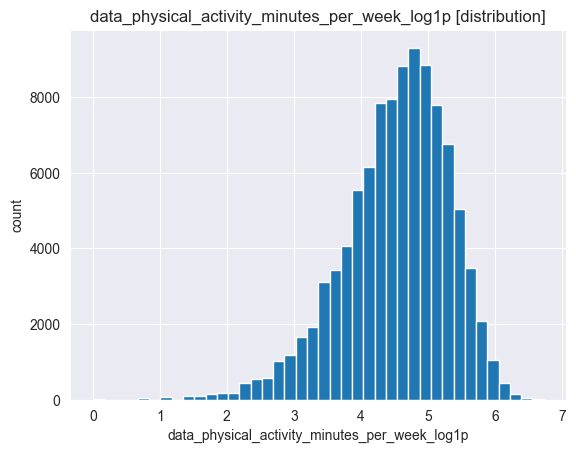

In [923]:
data_physical_activity_minutes_per_week_log1p = np.log1p(data_physical_activity_minutes_per_week)
plt.hist(data_physical_activity_minutes_per_week_log1p, bins=40)
plt.title('data_physical_activity_minutes_per_week_log1p [distribution]')
plt.xlabel('data_physical_activity_minutes_per_week_log1p')
plt.ylabel('count')
plt.show()

How `log1p` works:

$$log1p(x) = log(1 + x)$$

More information: https://numpy.org/devdocs/reference/generated/numpy.log1p.html

In [924]:
why_log1p = pd.DataFrame({
    'normal values': [1, 10, 100, 1000, 10000],
    'diff_norm [10-1, 100-10, 1000-100...]': ['-', 9, 90, 900, 9000],
    'log1p': ['log1p(1)', 'log1p(10)', 'log1p(100)', 'log1p(1000)', 'log1p(10000)'],
    'result': [np.log1p(1), np.log1p(10), np.log1p(100), np.log1p(1000), np.log1p(10000)],
    'diff_log [10-1, 100-10, 1000-100...]': ['-', (2.397895 - 0.693147), (4.615121 - 2.397895), (6.908755 - 4.615121), (9.210440 - 6.908755)],
})
why_log1p

,normal values,"diff_norm [10-1, 100-10, 1000-100...]",log1p,result,"diff_log [10-1, 100-10, 1000-100...]"
0,1,-,log1p(1),0.693147,-
1,10,9,log1p(10),2.397895,1.704748
2,100,90,log1p(100),4.615121,2.217226
3,1000,900,log1p(1000),6.908755,2.293634
4,10000,9000,log1p(10000),9.210440,2.301685


$$ln(10)=x$$ if $$e^x=10$$ => $$log1p(10) = log(10 + 1) = 2.397895$$

In [925]:
# log1p transformation
result_1 = data_physical_activity_minutes_per_week_log1p.skew()

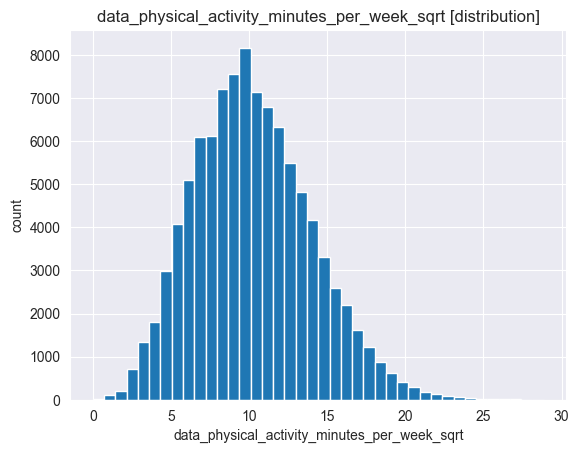

In [926]:
data_physical_activity_minutes_per_week_sqrt = np.sqrt(data_physical_activity_minutes_per_week)
plt.hist(data_physical_activity_minutes_per_week_sqrt, bins=40)
plt.title('data_physical_activity_minutes_per_week_sqrt [distribution]')
plt.xlabel('data_physical_activity_minutes_per_week_sqrt')
plt.ylabel('count')
plt.show()

In [927]:
# sqrt transformation
result_2 = data_physical_activity_minutes_per_week_sqrt.skew()

In [928]:
transformation_results = pd.DataFrame({
    'log1p': [result_1],
    'sqrt': [result_2]
}, index=['Transformation results']) 
transformation_results

,log1p,sqrt
Transformation results,-0.726857,0.391093


The final conclusion is that the `sqrt` transformation corrects the data and brings the skewness into the range of `0.00 – 0.50`. 

Based on these results, no further transformations are needed for this feature.

By using the `sqrt` transformation, we reduce the larger values more gently. As a result, the distribution does not shift as strongly as it does with `log1p`, making the transformation more stable and less aggressive.

In [929]:
data['physical_activity_minutes_per_week'] = np.sqrt(data['physical_activity_minutes_per_week'])
data

,age,gender,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,alcohol_consumption_per_week_1,alcohol_consumption_per_week_2,alcohol_consumption_per_week_3,alcohol_consumption_per_week_4,alcohol_consumption_per_week_5,alcohol_consumption_per_week_6,alcohol_consumption_per_week_7,alcohol_consumption_per_week_8,alcohol_consumption_per_week_9,alcohol_consumption_per_week_10
0,58.0,1.0,14.662878,5.7,7.9,7.9,0.0,0.0,0.0,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48.0,0.0,11.958261,6.7,6.5,8.7,0.0,0.0,0.0,23.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,1.0,7.549834,6.4,10.0,8.1,1.0,0.0,0.0,22.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,74.0,0.0,7.000000,3.4,6.6,5.2,0.0,0.0,0.0,26.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.0,1.0,10.440307,7.2,7.4,5.0,0.0,0.0,0.0,21.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46.0,1.0,11.661904,8.3,6.4,4.5,0.0,0.0,0.0,29.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,41.0,0.0,8.717798,8.8,6.8,4.8,0.0,0.0,0.0,26.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,57.0,0.0,11.000000,9.9,5.0,6.1,0.0,0.0,1.0,25.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,47.0,0.0,7.211103,5.9,6.7,0.5,0.0,1.0,0.0,26.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


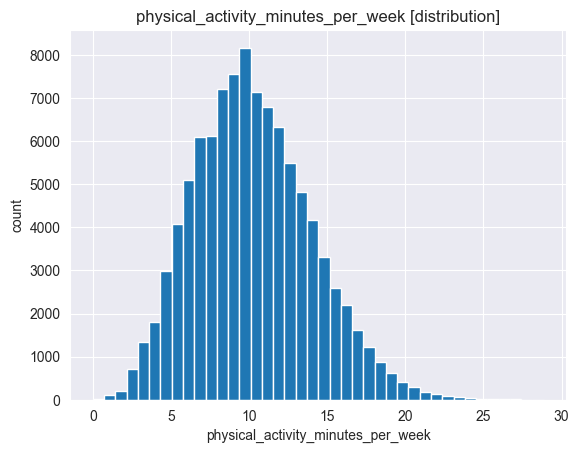

In [930]:
plt.hist(data['physical_activity_minutes_per_week'], bins=40)
plt.title('physical_activity_minutes_per_week [distribution]')
plt.xlabel('physical_activity_minutes_per_week')
plt.ylabel('count')
plt.show()

In [931]:
data['physical_activity_minutes_per_week'].skew()

np.float64(0.3910933887647937)

Here we demonstrated how to measure the symmetry (skewness) of each feature and decided which of them should be transformed. We tested two approaches - `log1p` and `sqrt` = and explained the differences between these methods and when each one is appropriate.

It is important to note that feature transformations are not required for all models, but mainly for those that are sensitive to **skewness**, such as:

- Linear Regression

- Logistic Regression

- kNN

- SVM

## IV. Feature preprocessing
In this section, we will process the remaining features. 

This includes detecting outliers and selecting the appropriate method for handling them, depending on their number and distribution. 

The goal is to reduce the impact of extreme values and improve data quality before modeling

---

In [932]:
data

,age,gender,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,alcohol_consumption_per_week_1,alcohol_consumption_per_week_2,alcohol_consumption_per_week_3,alcohol_consumption_per_week_4,alcohol_consumption_per_week_5,alcohol_consumption_per_week_6,alcohol_consumption_per_week_7,alcohol_consumption_per_week_8,alcohol_consumption_per_week_9,alcohol_consumption_per_week_10
0,58.0,1.0,14.662878,5.7,7.9,7.9,0.0,0.0,0.0,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48.0,0.0,11.958261,6.7,6.5,8.7,0.0,0.0,0.0,23.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,1.0,7.549834,6.4,10.0,8.1,1.0,0.0,0.0,22.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,74.0,0.0,7.000000,3.4,6.6,5.2,0.0,0.0,0.0,26.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.0,1.0,10.440307,7.2,7.4,5.0,0.0,0.0,0.0,21.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46.0,1.0,11.661904,8.3,6.4,4.5,0.0,0.0,0.0,29.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,41.0,0.0,8.717798,8.8,6.8,4.8,0.0,0.0,0.0,26.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,57.0,0.0,11.000000,9.9,5.0,6.1,0.0,0.0,1.0,25.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,47.0,0.0,7.211103,5.9,6.7,0.5,0.0,1.0,0.0,26.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [933]:
def outliers_detection(dataset: pd.DataFrame, feature: str) -> int:
    """
    This function detects outliers using the IQR method.
    
    Example:
    Given the values [10, 11, 12, 13, 14, 15, 16, 17, 18, 100]:
    - Q1 = 13, Q3 = 17 -> Q3 - Q1 = IQR = 4
    - Lower bound = Q1 - 1.5 * IQR = 7
    - Upper bound = Q3 + 1.5 * IQR = 23
    
    Any value below 7 or above 23 is considered an outlier.
    In this example, 100 is detected as an outlier.
    """
    q1 = dataset[feature].quantile(0.25)
    q3 = dataset[feature].quantile(0.75)
    iqr= q3 - q1
    
    lower_value = q1 - 1.5 * iqr
    upper_values = q3 + 1.5 * iqr

    return ((dataset[feature] < lower_value) | (dataset[feature] > upper_values)).sum()

In [934]:
feature_outliers = {}

for x in NUMERICAL_FEATURES:
    res = outliers_detection(data, x)
    feature_outliers[x] = res

In [935]:
total_rows = len(data)

outliers_calc = pd.DataFrame(
    feature_outliers.items(),
    columns=['feature', 'outlier_count']
)

outliers_calc['outlier_percent'] = round((outliers_calc['outlier_count'] / total_rows) * 100, 2)

outliers_calc = outliers_calc.sort_values(by='outlier_percent', ascending=False)
outliers_calc

,feature,outlier_count,outlier_percent
17,diabetes_risk_score,914,0.91
2,sleep_hours_per_day,900,0.90
8,heart_rate,855,0.86
0,physical_activity_minutes_per_week,757,0.76
13,glucose_fasting,745,0.74
4,bmi,744,0.74
7,diastolic_bp,731,0.73
14,glucose_postprandial,634,0.63
16,hba1c,618,0.62
10,hdl_cholesterol,565,0.56


In [936]:
# Overall percentage of outliers for the entire dataset
outliers_calc['outlier_percent'].sum()

np.float64(10.18)

In [937]:
summary_table

,Method,When To Use,Pros,Cons
IQR_drop,Removing Outliers,"Few outliers, large dataset",Cleanest data,Data loss
Clipping,Winsorization,"Many outliers, valid values","Keeps data, reduce extremes",Slight distortion
log1p,Transofrmations,Skewed data,Normalizes distribution,Less interpretable
Percentile_capping,Percentile Capping,Heavy-tailed real data,Flexible and robust,Requires tuning
Binning,Binning,Value precision not needed,Simplifies data,Loses information


Based on the analysis of all features and the number of outliers according to the `IQR method`, the only feature for which applying `log1p` is appropriate is 

`physical_activity_minutes_per_week`, due to its strong skewness. For the remaining features, applying `IQR_drop` is not suitable because the proportion of outliers relative
 
to the total number of observations exceeds 10%.

Value precision is needed for these features, which makes Binning unsuitable.

The features also do not exhibit heavy-tailed distributions, so percentile capping is not appropriate either.

Therefore, the only suitable method for handling outliers in these cases is Clipping (Winsorization).

In [938]:
# Without 'physical_activity_minutes_per_week' and 'diabetes_risk_score'.
NUMERICAL_FEATURES = ['diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day',
                      'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total',
                      'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 
                      'hba1c']

In [939]:
def clipper_function(dataset: pd.DataFrame, feature: str):
    """
    :param dataset: 
    :param feature: 
    :return: The function returns - the boundaries beyond which values are considered outliers.
     Computes the lower and upper bounds for outlier detection using the IQR method.
        
        Steps:
        1. Calculates Q1 (25th percentile) and Q3 (75th percentile) of the feature.
        2. Computes the IQR (Q3 − Q1).
        3. Determines the lower and upper clipping thresholds:
           - lower_value = Q1 − 1.5 × IQR
           - upper_value = Q3 + 1.5 × IQR
           
        These values can be used to detect or clip outliers based on the IQR rule.
    """
    q1 = dataset[feature].quantile(0.25)
    q3 = dataset[feature].quantile(0.75)
    iqr = q3 - q1
    
    lower_value = q1 - 1.5 * iqr
    upper_value = q3 + 1.5 * iqr
    
    return lower_value, upper_value

In [940]:
# clipper_function
lower, upper = clipper_function(data, 'diabetes_risk_score')

In [941]:
data['diabetes_risk_score'] = data['diabetes_risk_score'].clip(lower, upper)

In [942]:
# Checking the result
outliers_detection(data, 'diabetes_risk_score')

np.int64(0)

In [943]:
for feature in NUMERICAL_FEATURES:
    lower, upper = clipper_function(data, feature)
    data[feature] = data[feature].clip(lower, upper)

In [944]:
# All other features are clipped
# for f in NUMERICAL_FEATURES:
#     print(outliers_detection(data, f)) -> Easy way to check the results